In [138]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline

In [139]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from PreprocessingTools import MappingFunctions
from ProcessingTools import DateProcessingTools


In [140]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)
tool_lookup_tables = MappingFunctions(debug_level)


In [141]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [142]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [143]:
atlas.head()

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,
University 1,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 2,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 3,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 4,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 5,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days


In [144]:
atlas_ymq = tool_data_processing.extract_and_append_year_month_quarter(atlas, "Service Start")
atlas_ymq.reset_index(inplace=True)
atlas_ymq.sort_values(by="Service Start", ascending=True, inplace=True)

atlas_ymq.set_index("Service Start", inplace=True)

total_invoices_per_year = atlas_ymq.groupby('Year').sum().reset_index()
mean_invoices_per_year = atlas_ymq.groupby('Year').mean().reset_index()
number_of_invoices_per_year = atlas_ymq.groupby('Year').count().reset_index()

<AxesSubplot:ylabel='Invoice Amount'>

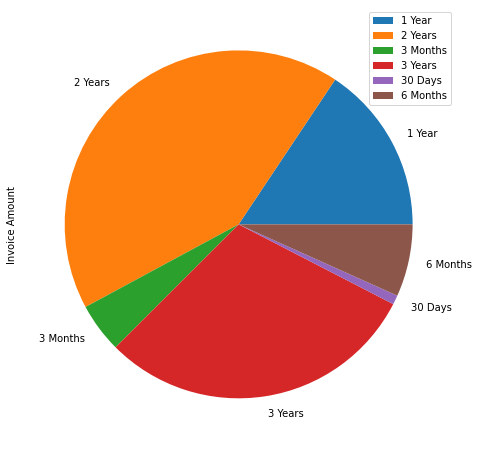

In [145]:
# Subscription quantity per subscription type
atlas.groupby(["Subscription"]).mean().plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))
# TODO Subscription count per subscription type

# TODO hvplot forall

# TODO use new data (removes 18months 5months)

In [146]:
# Subscription quantity per subscription type
atlas_grouped__year_subscription__mean  = atlas_ymq.groupby(["Year", "Subscription"]).sum()["Invoice Amount"].to_frame()
atlas_grouped__year_subscription__sum   = atlas_ymq.groupby(["Year", "Subscription"]).sum()["Invoice Amount"].to_frame()
atlas_grouped__year_subscription__count = atlas_ymq.groupby(["Year", "Subscription"]).count()["Invoice Amount"].to_frame()

plt__atlas_grouped__year_subscription__mean = atlas_grouped__year_subscription__mean.hvplot.bar(title="Avg. Invoice per Subscription: 2015 - 2020", ylabel="Invoice Amount ($)", stacked=False, logy=False, rot=90)
plt__atlas_grouped__year_subscription__sum = atlas_grouped__year_subscription__sum.hvplot.bar(title="Total Invoice Amount per Subscription: 2015 - 2020", ylabel="Invoice Amount ($)", stacked=False, logy=False, rot=90)
plt__atlas_grouped__year_subscription__count = atlas_grouped__year_subscription__count.hvplot.bar(title="Nbr. Invoices per Subscription: 2015 - 2020", ylabel="Nbr. of Invoices", stacked=False, logy=False, rot=90)



# .plot.pie(x="Customers", y="Invoice Amount", figsize=(8, 8))


# TODO Subscription count per subscription type

# TODO hvplot forall

# TODO use new data (removes 18months 5months)

In [147]:
plt__atlas_grouped__year_subscription__mean

:Bars   [Year,Subscription]   (Invoice Amount)

In [148]:
plt__atlas_grouped__year_subscription__sum

:Bars   [Year,Subscription]   (Invoice Amount)

In [149]:
plt__atlas_grouped__year_subscription__count

:Bars   [Year,Subscription]   (Invoice Amount)

# Top 20 Customers

In [150]:
atlas_ymq.dropna()

,index,Customers,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service End,Subscription Duration,Year,Monthly,Quarterly
Service Start,,,,,,,,,,,,,,,,
2015-06-01 00:00:00-04:00,1,University 2,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.00,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2016-06-30 00:00:00-04:00,365 days,2015.0,6.0,2.0
2015-06-10 00:00:00-04:00,2,University 3,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.00,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2016-06-30 00:00:00-04:00,365 days,2015.0,6.0,2.0
2015-10-22 00:00:00-04:00,9,University 8,250.0,2015-12-17 00:00:00-05:00,AJ508,3500.00,1 Year,4700-0-00-00000-00-0000,"200 Stadium Dr, Williamsburg, VA 23185",37.271740,-76.714260,2016-10-31 00:00:00-04:00,365 days,2015.0,10.0,4.0
2016-01-06 00:00:00-05:00,15,University 11,250.0,2016-01-12 00:00:00-05:00,AJ511,3500.00,1 Year,4700-0-00-00000-00-0000,"129 Taylor Education Bldg, Lexington, KY 40506",37.986014,-84.396001,2017-06-30 00:00:00-04:00,365 days,2016.0,1.0,1.0
2016-01-07 00:00:00-05:00,12,University 10,250.0,2016-01-11 00:00:00-05:00,AJ510,2166.67,1 Year,4700-0-00-00000-00-0000,"1101 W College Ave, Jacksonville, IL 62650",39.732210,-90.246947,2017-01-31 00:00:00-05:00,365 days,2016.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01 00:00:00-04:00,589,University 355,358.0,2020-09-17 00:00:00-04:00,NB091720A,1270.00,3 Months,4700-0-00-00000-00-0000,"101 Education Bldg., BGSU, Bowling Green, OH ...",41.379729,-83.622879,2020-12-30 00:00:00-05:00,90 days,2020.0,10.0,4.0
2020-10-02 00:00:00-04:00,620,University 375,50.0,2020-10-07 00:00:00-04:00,NB100820K,500.00,3 Months,4700-0-00-00000-00-0000,"101 College Hill Rd, Philippi, WV 26416",39.160261,-80.049048,2020-12-31 00:00:00-05:00,90 days,2020.0,10.0,4.0
2020-10-14 00:00:00-04:00,637,University 386,14.0,2020-10-15 00:00:00-04:00,NB101520A,1640.00,1 Year,4700-0-00-00000-00-0000,"E Main St & College Ave, Bexley, OH 43209",39.957227,-82.940015,2021-10-31 00:00:00-04:00,365 days,2020.0,10.0,4.0


In [151]:
atlas_ymq.dtypes

index                                               int64
Customers                                          object
Number of Users                                   float64
Invoice Date             datetime64[ns, America/New_York]
Invoice #                                          object
Invoice Amount                                    float64
Subscription                                       object
Account Code                                       object
Address                                            object
Lat                                               float64
Long                                              float64
Service End              datetime64[ns, America/New_York]
Subscription Duration                     timedelta64[ns]
Year                                              float64
Monthly                                           float64
Quarterly                                         float64
dtype: object

In [152]:
group_year = atlas_ymq.groupby(["Year"])["Invoice Amount"].sum()
group_year

Year
2015.0     137350.00
2016.0     296716.67
2017.0     349905.67
2018.0     239206.67
2019.0     210488.43
2020.0    1046638.79
Name: Invoice Amount, dtype: float64

In [153]:
group_year_customers = atlas_ymq.groupby(["Year"])["Number of Users"].sum()

In [154]:
group_year_customers

Year
2015.0      600.0
2016.0    13055.0
2017.0     8855.0
2018.0     2275.0
2019.0     6261.0
2020.0    87170.0
Name: Number of Users, dtype: float64

In [155]:
atlas_ymq_filtered = atlas_ymq[atlas_ymq["Year"] == 2020]
atlas_ymq_filtered_cumsum = atlas_ymq_filtered.loc[:, ["Invoice Amount", "Number of Users", "Subscription Duration"]].cumsum(axis=0)

invoice_trend_standard_plot = atlas_ymq_filtered_cumsum.hvplot.line(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000
)

invoice_trend_log_plot = atlas_ymq_filtered_cumsum.hvplot.line(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000,
    logy=True
)

invoice_trend_barh_plot = atlas_ymq_filtered_cumsum.hvplot.barh(
    x="Service Start",
    y=["Invoice Amount", "Number of Users"],
    # y=["Invoice Amount", "Number of Users", "Subscription Duration"],
    xlabel="Nbr Users",
    ylabel="Invoice Amount ($)",
    title="Invoice Amount (2020)",
    width=1000,
    height=5000
)

pn.Column(invoice_trend_standard_plot, invoice_trend_log_plot,
#  invoice_trend_barh_plot
)

Column
    [0] HoloViews(NdOverlay)
    [1] HoloViews(NdOverlay)

In [156]:
# Calculate the mean values for each neighborhood
#rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI', 
#                              't20':'T20'}, inplace = True) 

#atlas2.columns = ["Customers", "Lat", "Long"]

mean_data = atlas.groupby(["Customers"]).mean()
mean_data.reset_index(inplace=True)
mean_data.dropna(inplace=True)
mean_data


,Customers,Number of Users,Invoice Amount,Lat,Long
1,University 10,116.666667,2240.002000,39.196370,-90.246947
12,University 11,216.666667,3500.000000,37.986014,-84.396001
14,University 111,50.000000,1166.666667,33.516737,-86.851710
34,University 13,168.750000,866.071429,34.938466,-81.029872
39,University 134,260.000000,6025.000000,32.981204,-80.071966
...,...,...,...,...,...
379,University 8,173.333333,2600.000000,37.271740,-76.714260
380,University 80,58.333333,1450.000000,31.327811,-89.332063
387,University 87,25.000000,750.000000,38.873463,-77.083371
390,University 9,135.000000,1283.333333,35.948357,-83.231778


In [157]:
# px.set_mapbox_access_token(mapbox_token)
# map = px.scatter_mapbox(
#     mean_data,
#     lat="Lat",
#     lon="Long",
#     size="Invoice Amount",
#     color="Customers",
#     title="Mean Invoice Amount ($)",
#     width=1500,
#     height=800
#     # mapbox_style = 'stamen-watercolor'
# )
# map.show()

In [158]:

total_data = atlas.groupby(["Customers"]).sum()
total_data.reset_index(inplace=True)
total_data.dropna(inplace=True)
total_data


,Customers,Number of Users,Invoice Amount,Lat,Long
0,University 1,0.0,139000.00,60.920165,-182.377131
1,University 10,350.0,11200.01,195.981848,-451.234735
2,University 100,200.0,2250.00,0.000000,0.000000
3,University 101,25.0,5775.00,0.000000,0.000000
4,University 102,25.0,500.00,0.000000,0.000000
...,...,...,...,...,...
396,University 95,2050.0,18275.00,0.000000,0.000000
397,University 96,1000.0,14000.00,0.000000,0.000000
398,University 97,0.0,100000.00,0.000000,0.000000
399,University 98,0.0,5460.00,34.785061,-86.573280


In [159]:
# px.set_mapbox_access_token(mapbox_token)
# map = px.scatter_mapbox(
#     total_data,
#     lat="Lat",
#     lon="Long",
#     size="Invoice Amount",
#     color="Customers",
#     title="# Total Invoice Amount ($)",
#     width=1500,
#     height=800,
#     mapbox_style = 'basic'
# )
# map.show()

In [160]:
# def neighborhood_map():
#     """Neighborhood Map"""
#      = atlas2.groupby(["Customers"]).mean()
#     mean_data.reset_index(inplace=True)
#     px.set_mapbox_access_token(mapbox_token)
#     neighborhood_map_plot = px.scatter_mapbox(
#             mean_data,
#             lat="Lat",
#             lon="Long",
#             size="Subscription",
#             color="Customer"
#         )
#     return neighborhood_map_plot
# neighborhood_map()

In [161]:
# Identify existing and potential customers
customer_name_mapping               = tool_lookup_tables.read_customer_name_mapping()
all_potential_customers_mapping     = tool_lookup_tables.read_lookup_table(constants.LUT_POTENTIAL_CUSTOMER_NAME_FILE_PATH)

paying_customers = list(customer_name_mapping.keys())
all_potential_customers = list(all_potential_customers_mapping.keys())

customers_df = pd.DataFrame([paying_customers, all_potential_customers])
customers_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834
0,Louisiana Board of Regents,Emporia State University,Morehead State University,State University of NY Potsdam,ST. Mary's College of Maryland,Clark County Education Association,Bureau of Indian Affairs,College of William and Mary,Georgia College and State University,Illinois College,...,None,None,None,None,None,None,None,None,None,None
1,Aaniiih Nakoda College,Abdullah Gul University,Abertay University,Aberystwyth,Aberystwyth University,Abilene Christian University,Abraham Baldwin Agricultural College,Academy College,Academy of Art University,Ada University,...,York Technical College,York University,Young Harris College,Youngstown State University,YTI Career Institute: Altoona,YTI Career Institute: Lancaster,YTI Career Institute: York,Yuba College,Zane State College,Zouk Mosbeh


In [162]:
# Calculate market penetration

# TODO remove duplicates
# TODO Match names
# TODO Generate pie chart

nbr_paying_customers = len(paying_customers)
nbr_potential_customers = len(all_potential_customers)
market_penetration = nbr_paying_customers / nbr_potential_customers

## Print results
print(f"The number of paying cusomters is {nbr_paying_customers}")
print(f"The number of potential cusomters is {nbr_potential_customers}")
print(f"Market penetration is {market_penetration * 100} %")

## Generate heatmap
# all_potential_customers   .hvplot.heatmap(x='time.month', y='time.day', C='temperature', 
#                   height=500, width=500, colorbar=False)


The number of paying cusomters is 670
The number of potential cusomters is 3835
Market penetration is 17.470664928292045 %


In [163]:
atlas2_ymq_filtered.head(2)

,index,Customers,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service End,Subscription Duration,Year,Monthly,Quarterly
Service Start,,,,,,,,,,,,,,,,
2020-01-21 00:00:00-05:00,346,University 37,200.0,2020-04-23 00:00:00-04:00,NB042320B,2000.0,1 Year,4700-0-00-00000-00-0000,"1021 Central Ave, Demorest, GA 30535",34.566567,-83.54284,2018-11-22 21:11:05.145122-05:00,365 days,2020.0,1.0,1.0
2020-01-31 00:00:00-05:00,280,University 37,250.0,2020-03-20 00:00:00-04:00,NB032020D,1000.0,1 Year,4700-0-00-00000-00-0000,"1021 Central Ave, Demorest, GA 30535",34.566567,-83.54284,2021-01-31 00:00:00-05:00,365 days,2020.0,1.0,1.0


In [164]:
# Generate heatmap
atlas2_ymq_filtered.reset_index().hvplot.heatmap(x='Lat', y='Long', C='Invoice Amount', 
                  height=500, width=500, colorbar=False)


:HeatMap   [Lat,Long]   (Invoice Amount)